# Báo cáo đồ án Khoa Học Dữ Liệu
## Chủ đề: Airline Data Analysis
- Thông tin nhóm:
  - Nguyễn Ngọc Đức - 21424007
  - Phan Phi Hùng - 21424023
  - Lưu Minh Huy - 21424026
  - Liêu Hy Quỳnh - 21424048
- Github: https://github.com/PhiHung160420/airline_data_analysis.git

# Nội dung báo cáo
1.	Quy trình khoa học dữ liệu
  -	Dữ liệu được thu thập là gì? Thu thập từ đâu? Cách thu thập? Kết quả thu thập được là gì? 
  -	Khám phá và phân tích dữ liệu
  -	Đặt và trả lời các câu hỏi về dữ liệu
2.	Mô hình hoá dữ liệu
  -	Cách xây dựng mô hình hoá từ dữ liệu
  -	Đánh giá mô hình
3.	Tổng kết
  -	Gặp những khó khăn gì?
  -	Làm gì nếu có được nhiều thời gian hơn?


# 1. Quy trình khoa học dữ liệu
### 1.1 Dữ liệu được thu thập là gì? Thu thập từ đâu? Cách thu thập? Kết quả thu thập được là gì? 
- Dữ liệu được thu thập là danh sách các chuyến bay ở Việt Nam được lấy từ Google Flight (https://www.google.com/travel/flights)
- Sử dụng selenium và scraping tools để thu thập dữ liệu
- Kết quả thu thập được ghi vào file csv

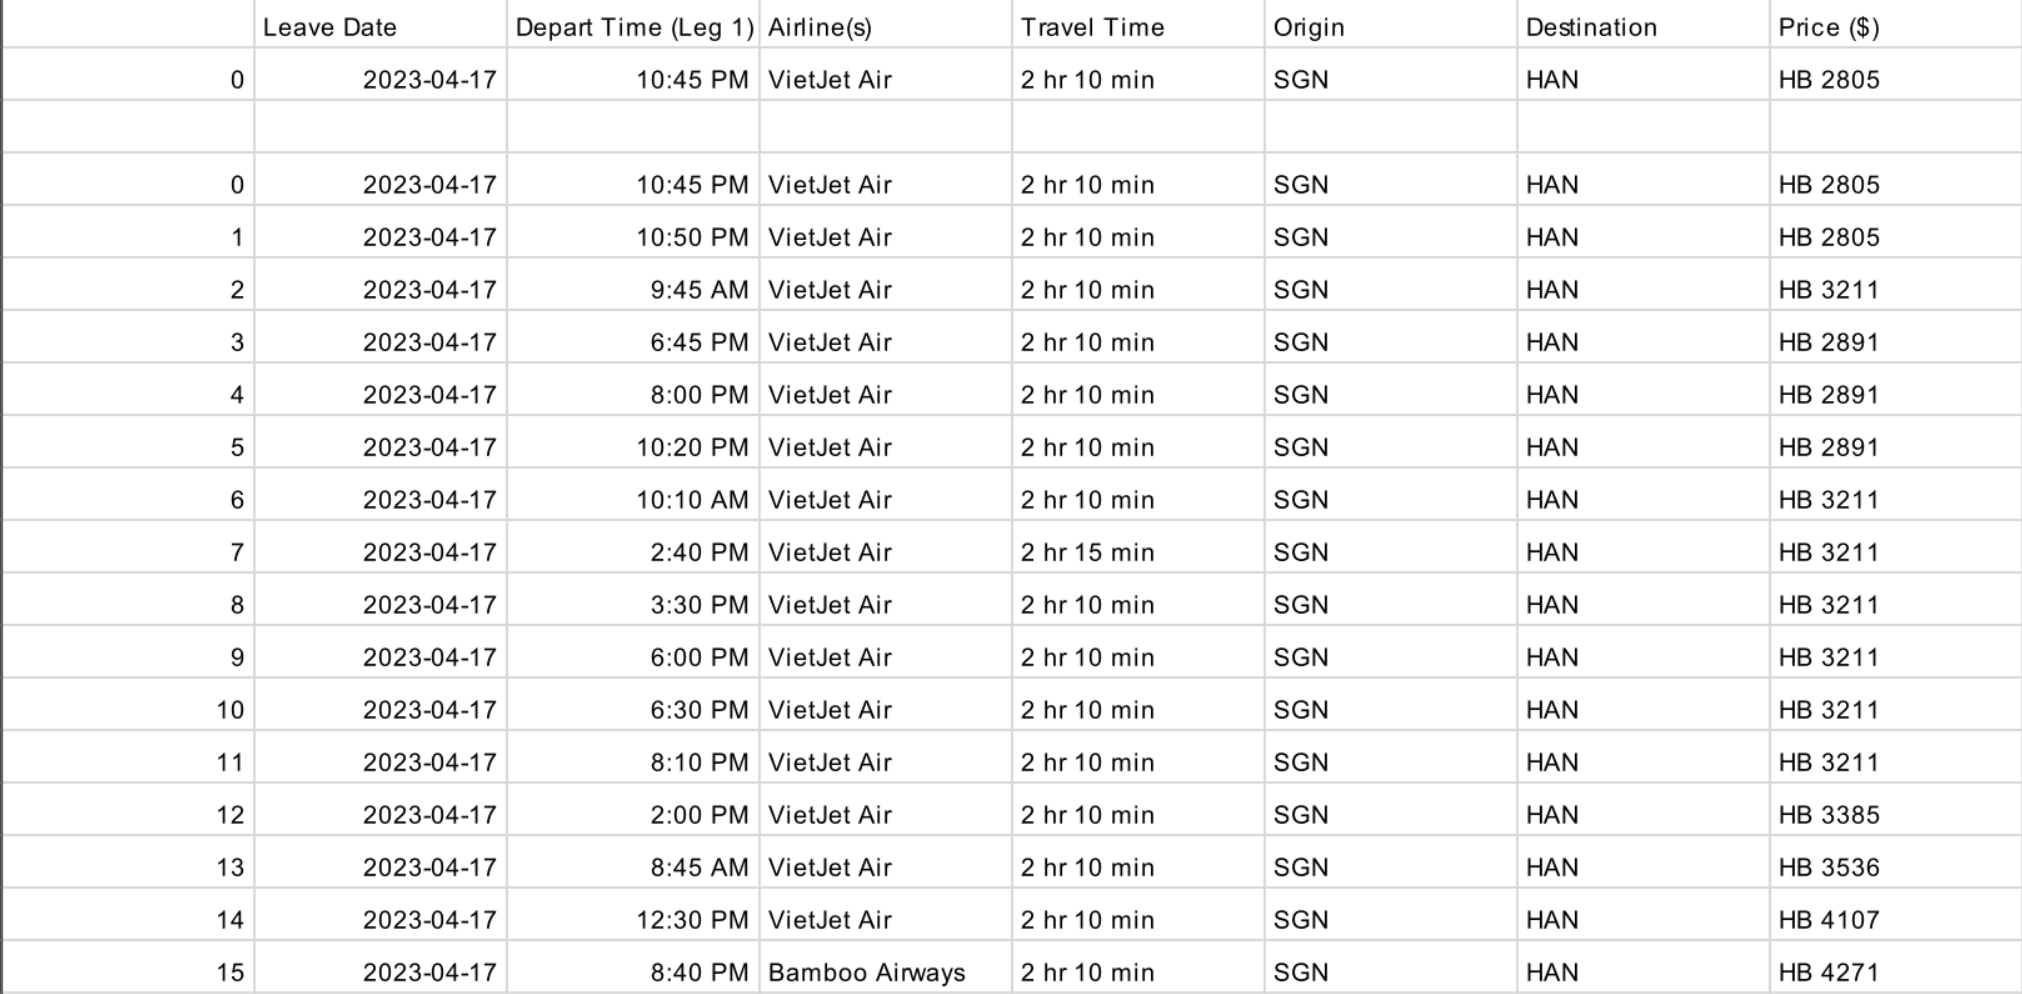

### 1.2 Khám phá và phân tích dữ liệu
- Mỗi dòng và mỗi cột dữ liệu có ý nghĩa gì?
    - Mỗi dòng và mỗi cột dữ liệu thể hiện các thông tin sau: Ngày khởi hành (Leave Date), thời gian khởi hành (Depart Time), Hãng bay (Airline), thời gian bay dự kiến (Travel Time), Điểm khởi hành (Origin), Điểm đến (Destination), giá vé (Price)
- Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?
  - Dữ liệu ở cột Price cần xử lí để đưa về định dạng VND
  - Xử lí chuyển dữ liệu ở cột Travel Time sang đơn vị giờ
  - chuyển đổi giá trị trong cột "Depart Time (Leg 1)" từ định dạng giờ:phút AM/PM sang đơn vị giờ và đơn vị phút
  #### Dữ liệu sau khi được xử lí và ghi lại vào file csv
  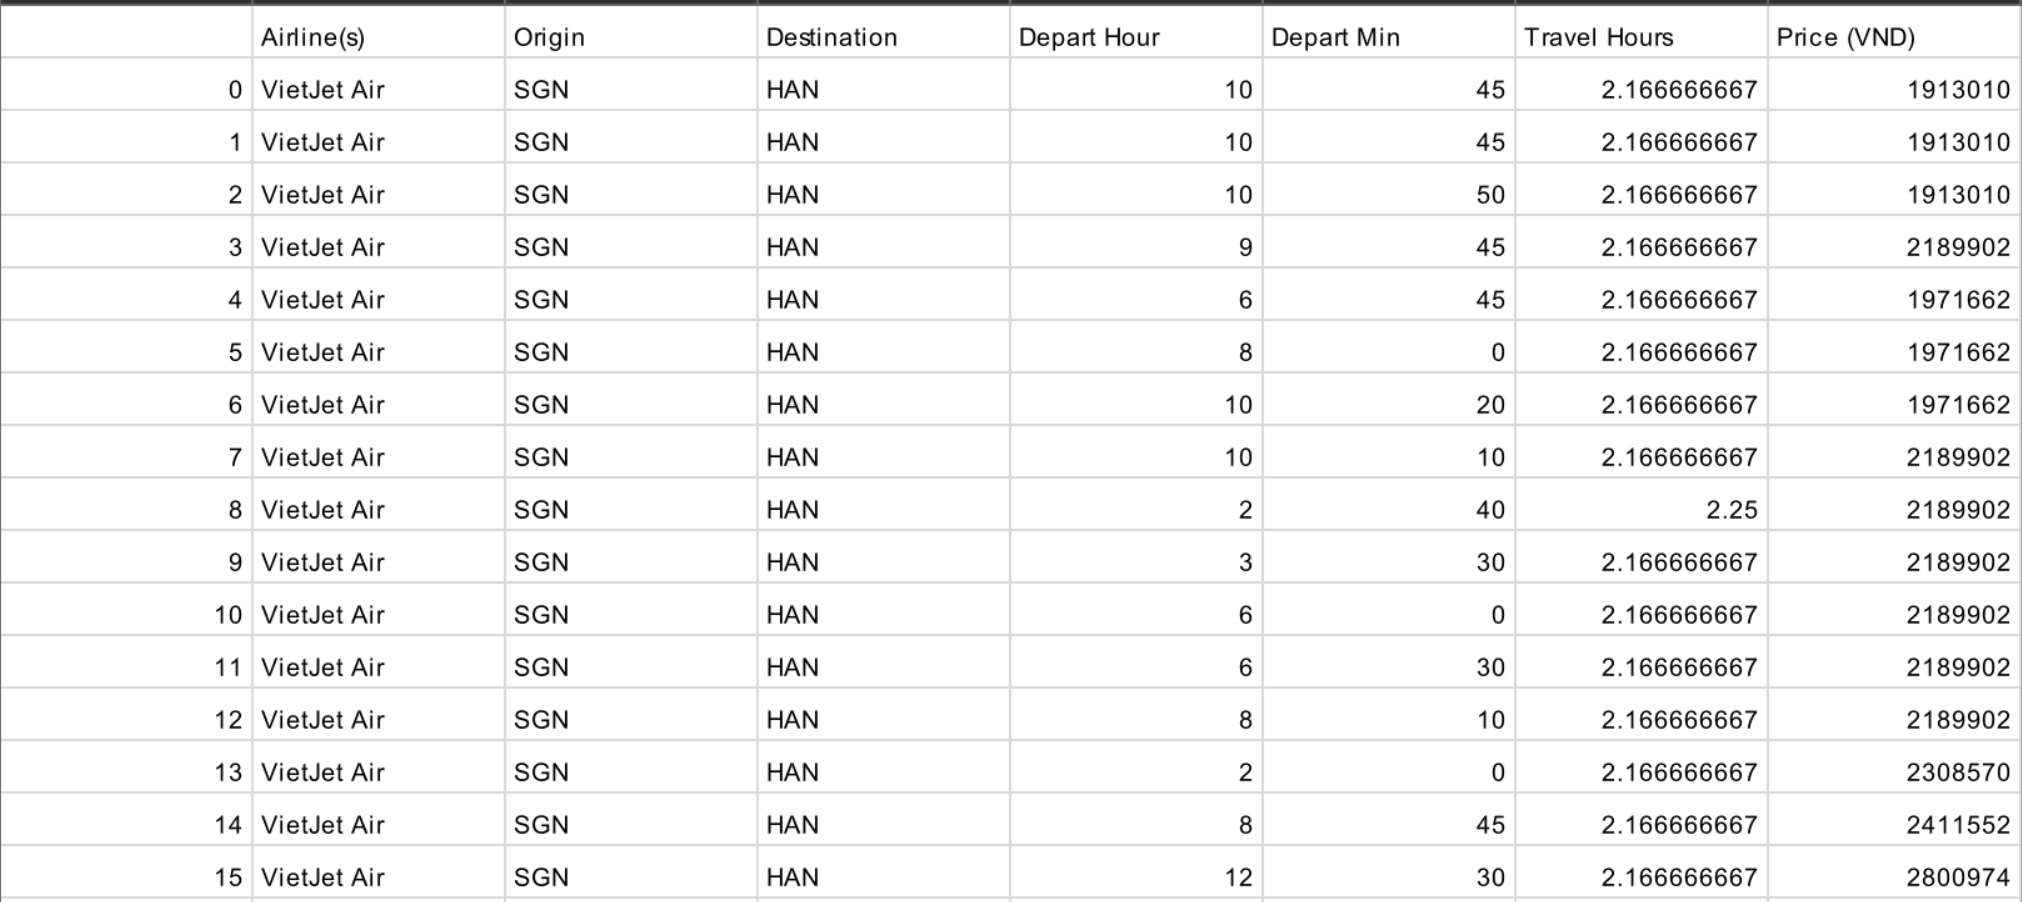


### 1.3 Đặt và trả lời câu hỏi về dữ liệu


### Số lượng chuyến bay của từng hãng là bao nhiêu?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/crawled_data/clean_flight.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Airline(s),Origin,Destination,Depart Hour,Depart Min,Travel Hours,Price (VND)
0,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
1,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
2,VietJet Air,SGN,HAN,10.0,50.0,2.166667,1913010
3,VietJet Air,SGN,HAN,9.0,45.0,2.166667,2189902
4,VietJet Air,SGN,HAN,6.0,45.0,2.166667,1971662


Text(0.5, 1.0, 'Airline')

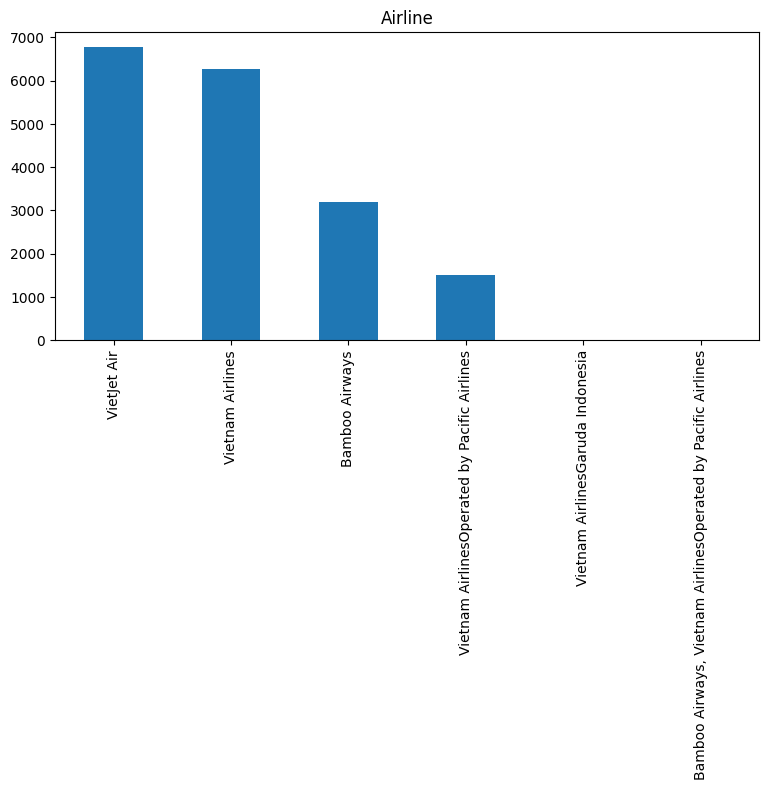

In [4]:
plt.figure(figsize=(20, 4))
plt.subplot(121)
df['Airline(s)'].value_counts().plot(kind='bar')
plt.title('Airline')

In [5]:
df['Airline(s)'].value_counts()

VietJet Air                                                     6786
Vietnam Airlines                                                6277
Bamboo Airways                                                  3199
Vietnam AirlinesOperated by Pacific Airlines                    1498
Vietnam AirlinesGaruda Indonesia                                   1
Bamboo Airways, Vietnam AirlinesOperated by Pacific Airlines       1
Name: Airline(s), dtype: int64

### Giá vé trung bình của mỗi hãng bay là bao nhiêu?

In [7]:
X_agg = df.groupby('Airline(s)', as_index=False).agg({'Price (VND)':['count', 'sum']})
X_agg['Average Price'] = X_agg['Price (VND)']['sum']/X_agg['Price (VND)']['count']
X_agg

Airline(s) Price (VND)               \
                                                           count          sum   
0                                     Bamboo Airways        3199   9581633512   
1  Bamboo Airways, Vietnam AirlinesOperated by Pa...           1      7611120   
2                                        VietJet Air        6786  15420587424   
3                                   Vietnam Airlines        6277  20022476540   
4                   Vietnam AirlinesGaruda Indonesia           1      3620056   
5       Vietnam AirlinesOperated by Pacific Airlines        1498   4421264144   

  Average Price  
                 
0  2.995196e+06  
1  7.611120e+06  
2  2.272412e+06  
3  3.189816e+06  
4  3.620056e+06  
5  2.951445e+06

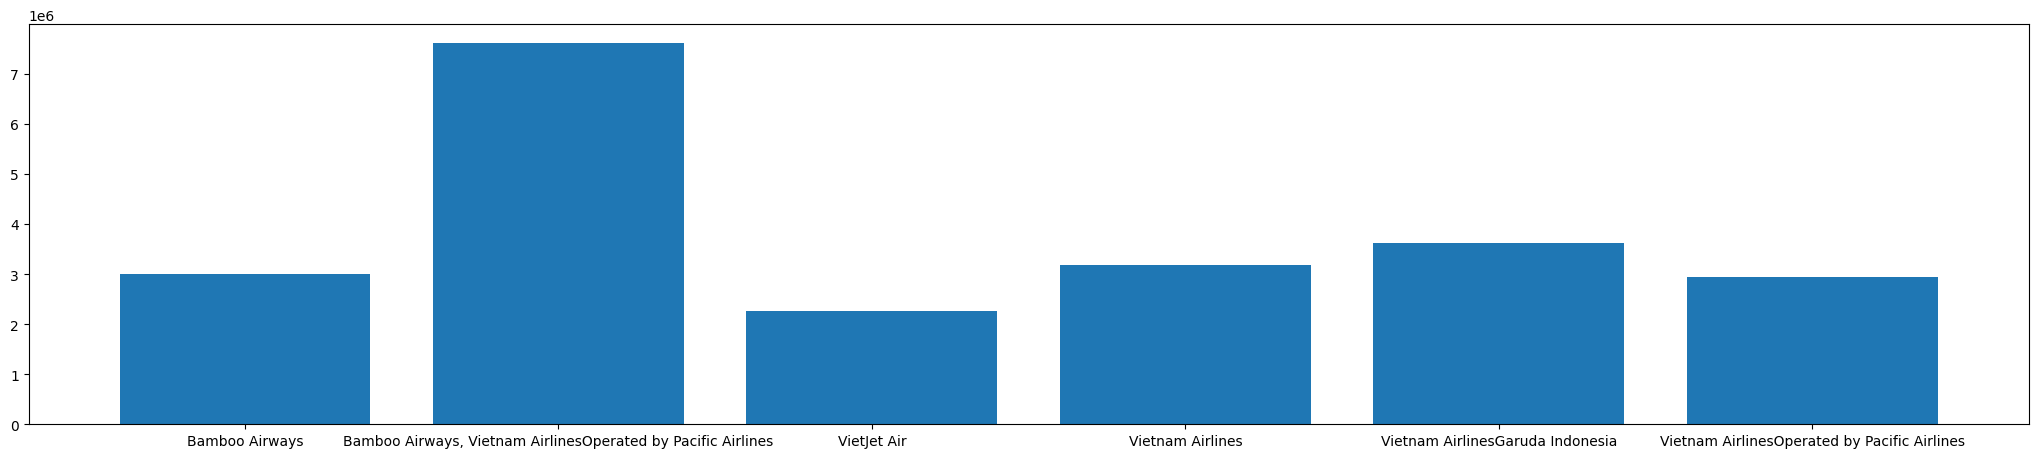

In [8]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_agg['Airline(s)'],X_agg['Average Price'])
plt.show()

### Có bao nhiêu chuyến bay từ Sài Gòn đến Hà Nội?

In [16]:
agg_source_dest = df.groupby(['Origin', 'Destination'], as_index=False).agg({'Price (VND)':['count', 'sum']})
agg_source_dest['Origin-Destination'] = agg_source_dest['Origin'] + ' - ' + agg_source_dest['Destination']
agg_source_dest['Count'] = agg_source_dest['Price (VND)']['count']
agg_source_dest['Average Price'] = agg_source_dest['Price (VND)']['sum']/agg_source_dest['Price (VND)']['count']
agg_source_dest = agg_source_dest.drop(['Origin', 'Destination', 'Price (VND)'], axis=1)

<ipython-input-16-f64b27705e8e>:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg_source_dest = agg_source_dest.drop(['Origin', 'Destination', 'Price (VND)'], axis=1)


In [17]:
agg_source_dest.loc[agg_source_dest['Origin-Destination'] == 'SGN - HAN']

,Origin-Destination,Count,Average Price
,,,
44,SGN - HAN,1852,3.485232e+06


 Có tổng 1852 chuyến bay từ Sài Gòn đến Hà Nội, giá vé trung bình 3.48 tr

### Chuyến bay có giá vé trung bình đắt nhất là chuyến bay nào?

In [18]:
agg_source_dest.loc[agg_source_dest['Average Price'].idxmax()]

Origin-Destination      UIH - HPH
Count                           1
Average Price           6120950.0
Name: 50, dtype: object

Chuyến bay có giá trung bình đắt nhất là từ Bình Định (sân bay Phù Cát) đến Hải Phòng (sân bay Cát Bi) với giá vé trung bình là 6.12 tr

### Chuyến bay có giá vé trung bình rẻ nhất là chuyến bay nào?

In [19]:
agg_source_dest.loc[agg_source_dest['Average Price'].idxmin()]

Origin-Destination      VCA - DLI
Count                           4
Average Price           1602188.5
Name: 53, dtype: object

Chuyến bay có giá trung bình rẻ nhất từ Cần Thơ (sân bay Cần Thơ) đến Lâm Đồng (sân bay Liên Khương) với giá vé trung bình là 1.6 tr

# 2. Mô hình hoá dữ liệu

Trong phần này, sử dụng 4 model là Linear Regression, SVM Regressor, Neuron Network và RandomForest để train tập dữ liệu sau đó so sánh kết quả các model để tìm ra model tốt nhất

| Model | Mô tả model | Ưu điểm | Nhược điểm | 
|:-------|:------:|:-------:|:-------:|
|  Linear Regression  |  Linear Regression là một mô hình học máy đơn giản, dựa trên mối quan hệ tuyến tính giữa biến độc lập và biến phụ thuộc. Phương pháp này tìm một đường thẳng tốt nhất để xấp xỉ mối quan hệ giữa các biến.  | Dễ hiểu và đơn giản để triển khai. Khả năng dự đoán tốt khi các mối quan hệ tuyến tính giữa biến phụ thuộc và các biến độc lập. | Không phù hợp với các mối quan hệ phi tuyến tính và sự tương quan giữa các biến độc lập. |
|  SVM Regression  |  SVM Regression sử dụng một hàm kernel để chuyển dữ liệu sang không gian cao hơn, từ đó tìm một siêu phẳng tốt nhất để xấp xỉ mối quan hệ giữa các biến. | Hiệu quả trong việc xử lý các tập dữ liệu lớn với số lượng biến độc lập lớn. Có khả năng xử lý được các mối quan hệ phi tuyến tính giữa biến độc lập và biến phụ thuộc. | Phải chọn đúng hệ số điều chỉnh và hạng số để tránh overfitting. |
| Neural Network | Neural Network là một mô hình học máy được xây dựng dựa trên cấu trúc của các tế bào thần kinh trong não. Mô hình này sử dụng một số lượng lớn các nút (neurons) được kết nối với nhau để học mối quan hệ giữa các biến đầu vào và biến đầu ra. | Có khả năng xử lý được các mối quan hệ phi tuyến tính và các mô hình phức tạp hơn. Điều chỉnh được các thông số để giúp mô hình học tập tốt hơn. | Cần có số lượng dữ liệu lớn để đào tạo mô hình. Đôi khi khó hiểu và khó giải thích. |
| Random Forest | Random Forest là một phương pháp học máy dựa trên việc xây dựng nhiều cây quyết định (decision trees) độc lập và kết hợp kết quả của chúng để đưa ra dự đoán. | Xử lý được các mối quan hệ phi tuyến tính và sự tương quan giữa các biến độc lập. Cho phép xác định độ quan trọng của các biến đầu vào. | Không thể giải thích rõ ràng cho các quyết định của mô hình. Dễ bị overfitting khi có quá nhiều cây trong rừng. |

### Sử dụng mô hình LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()
 
linearRegressionModel.fit(X_train, y_train)

### sử dụng mô hình SVM Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

### sử dụng mô hình SVM Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 30, 50, 30, 10),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)
nn.fit(X_train, y_train)

### sử dụng mô hình RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()  
clf.fit(X_train, y_train)

### Tiến hành kiểm tra các mô hình


Ở đây, ta kiểm tra độ chính xác của các mô hình bằng 2 tham số là MAE và RMSE:
    MAE (Mean Absolute Error) là giá trị trung bình của độ lỗi tuyệt đối giữa giá trị dự báo và giá trị thực tế
    RMSE (Root Mean Squared Error) là một phép đo sai số dự báo phổ biến, được tính bằng cách lấy căn bậc hai của trung bình tổng bình phương sai số giữa dự báo và giá trị thực tế


In [ ]:
# kiểm tra độ chính xác của mô hình linear regression
y_pred_lg = linearRegressionModel.predict(X_test)

print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_lg)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred_lg)))


In [ ]:
# kiểm tra độ chính xác của mô hình SVR
y_pred_svr = svr.predict(X_test)

print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred_svr)))

In [ ]:
# kiểm tra độ chính xác của mô hình neuron network
y_pred_nn = nn.predict(X_test)
     
print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred_nn)))

In [ ]:
# kiểm tra độ chính xác của mô hình random forest
y_pred = clf.predict(X_test)

print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred)))

Visualize kết quả 

In [ ]:
import matplotlib.pyplot as plt

# Khởi tạo dữ liệu cho 4 đối tượng
LnRMSE = np.sqrt(mean_squared_error(y_test, y_pred_lg))
SvrRMSE = np.sqrt(mean_squared_error(y_test, y_pred_svr))
NnRMSE = np.sqrt(mean_squared_error(y_test, y_pred_nn))
RfRMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# Vẽ biểu đồ cột so sánh RMSE
x = np.array(['Linear','SVR','Neuron network','RandomForest'])
y = np.array([LnRMSE, SvrRMSE, NnRMSE, RfRMSE])
plt.bar(x,y)

# Thêm chú thích cho biểu đồ
plt.ylabel('RMSE')
plt.xlabel('Model')

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Khởi tạo dữ liệu cho 4 đối tượng
LnMAE = np.sqrt(mean_absolute_error(y_test, y_pred_lg))
SvrMAE = np.sqrt(mean_absolute_error(y_test, y_pred_svr))
NnMAE = np.sqrt(mean_absolute_error(y_test, y_pred_nn))
RfMAE = np.sqrt(mean_absolute_error(y_test, y_pred))

# Vẽ biểu đồ cột so sánh RMSE
x = np.array(['Linear','SVR','Neuron network','RandomForest'])
y = np.array([LnMAE, SvrMAE, NnMAE, RfMAE])
plt.bar(x,y)

# Thêm chú thích cho biểu đồ
plt.ylabel('MAE')
plt.xlabel('Model')

# Hiển thị biểu đồ
plt.show()